## Capstone Project - The Battle of Neighborhoods (Week-1)

### I started this project based on the hope of finding a solution for two of my friends who are looking for opening a drive through coffee shop in Cleveland - Ohio. They also want to buy a property to open that coffee shop instead of longterm rental.
### Learning how to segment and cluster data is a great tool for me to analyze Cleveland  neighborhoods and from collected data, I would give a recommendation to my friends where should they open the shop, in what area of the city that would make more benefits for them.

### In this assignment, I will collect data in Cleveland , get its latitude and longitude values. In order to do that, I used Foursquare API to explore the neighborhoods in Cleveland. Then use the explore function to get the  most common venue categories in each neighborhood , cluster neighborhood into groups and find out about the most popular area that attract people to come for coffee. Does not mean that I would go for the busy area or the most popular due to competition and high cost of land, but idealy I would see the potential around and give my friends an insight of where is the most making sense for all. 

### The source of getting data in Cleveland city is a little limit, but thanks to the internet and some people also wanted to get the same dataset before, I would be able to collect the neighborhoods dataset in Cleveland. 

### Before getting neccessary data, I download all the dependencies that we will need.

In [1]:
import numpy as np

import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json

from geopy.geocoders import Nominatim

import requests

from pandas.io.json import json_normalize

import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

import folium

print('All imported!')

All imported!


## 1. Down load and Explore Dataset

### So this dataset is a json file contains 24 neighborhoods in Cleveland. The data only has the name of each neighborhood, lat, lng coordinates.

### I downloaded dataset to my computer in the same directory with this notebook.

In [2]:
pwd

'C:\\Users\\MyPC\\Battle Neighborhood Part 1'

In [3]:
with open('nhboundaries.geojson') as json_data:
    cleveland_data = json.load(json_data)

In [4]:
cleveland_data

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'id': 'way/-2804',
   'properties': {'name': 'Buckeye',
    'neighborhood': 'buck',
    'place': 'neighbourhood',
    'id': 'way/-2804'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-81.60861261451102, 41.484871756995084],
      [-81.61704396998813, 41.48330900952773],
      [-81.6199047780695, 41.478952640275125],
      [-81.62174327692946, 41.47536574538295],
      [-81.62156880326094, 41.471916006354185],
      [-81.61375393179307, 41.47024737751858],
      [-81.60985102108795, 41.46947850351672],
      [-81.60467713749084, 41.46860162190031],
      [-81.5917719570791, 41.46597668874127],
      [-81.59180009988572, 41.471775845480494],
      [-81.591850783381, 41.47540826645263],
      [-81.59194076009366, 41.479856806972556],
      [-81.5931754221783, 41.47995801671732],
      [-81.59336035046901, 41.48324232872355],
      [-81.59377715465232, 41.48334329170188],
      [-81.59775824370713, 41.4833243229

In [5]:
neighborhoods_data = cleveland_data['features']

In [6]:
neighborhoods_data[0]


{'type': 'Feature',
 'id': 'way/-2804',
 'properties': {'name': 'Buckeye',
  'neighborhood': 'buck',
  'place': 'neighbourhood',
  'id': 'way/-2804'},
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-81.60861261451102, 41.484871756995084],
    [-81.61704396998813, 41.48330900952773],
    [-81.6199047780695, 41.478952640275125],
    [-81.62174327692946, 41.47536574538295],
    [-81.62156880326094, 41.471916006354185],
    [-81.61375393179307, 41.47024737751858],
    [-81.60985102108795, 41.46947850351672],
    [-81.60467713749084, 41.46860162190031],
    [-81.5917719570791, 41.46597668874127],
    [-81.59180009988572, 41.471775845480494],
    [-81.591850783381, 41.47540826645263],
    [-81.59194076009366, 41.479856806972556],
    [-81.5931754221783, 41.47995801671732],
    [-81.59336035046901, 41.48324232872355],
    [-81.59377715465232, 41.48334329170188],
    [-81.59775824370713, 41.483324322957245],
    [-81.59826569292693, 41.48354794306724],
    [-81.6027719408226, 41.48385016

## Tranform the data into a pandas dataframe

### Now, since I have the source dataset that I need, I created a dataframe with 4 columns and loop through the dataset to fill the dataframe for each row at the time.

In [7]:
columns_name = ['Name', 'Neighborhood', 'Latitude', 'Longitude']

neighborhoods_clv = pd.DataFrame(columns=columns_name)

In [8]:
neighborhoods_clv

,Name,Neighborhood,Latitude,Longitude


In [9]:
for data in neighborhoods_data:
    neighborhood = neighborhood_name = data['properties']['neighborhood']
    neighborhood_name = data['properties']['name']
    
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[0][0][1]
    neighborhood_lon = neighborhood_latlon[0][0][0]
    
    neighborhoods_clv = neighborhoods_clv.append({'Name': neighborhood_name,
                                                 'Neighborhood' : neighborhood,
                                                 'Latitude': neighborhood_lat,
                                                 'Longitude': neighborhood_lon}, ignore_index=True)

In [10]:
neighborhoods_clv

,Name,Neighborhood,Latitude,Longitude
0,Buckeye,buck,41.484872,-81.608613
1,Shaker Square,ss,41.495017,-81.603253
2,Central,cen,41.501634,-81.648466
3,Kinsman,km,41.480901,-81.645777
4,North Collinwood,ncol,41.555867,-81.591111
5,Hough,hough,41.504561,-81.651794
6,Asiatown,at,41.510442,-81.670588
7,The Flats,flats,41.494976,-81.710536
8,West Park,wp,41.469688,-81.781418
9,Cudell,cd,41.462062,-81.768890


### Check to see the dataset has how many neighborhoods in Cleveland

In [11]:
print('The dataframe has {} neighborhoods'.format(len(neighborhoods_clv['Neighborhood'].unique()), neighborhoods_clv.shape[1]))

The dataframe has 24 neighborhoods


### Use geopy library to get the latitude and longitude values of Cleveland

In [12]:
address = 'Cleveland, Ohio'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Cleveland are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Cleveland are 41.5051613, -81.6934446.


### I created a map of Clevend with neighborhoods superimposed on top by using folium Map to visualize each location of the neighborhood.

In [13]:
# Based on latitude and longitude values collected above, I created a visualization folium map of Cleveland City
map_cleveland = folium.Map(location=[latitude, longitude], zoom_start=10)

# Add markers on the top 
for lat, lon, name, neighborhood in zip(neighborhoods_clv['Latitude'], neighborhoods_clv['Longitude'],
                                       neighborhoods_clv['Name'], neighborhoods_clv['Neighborhood']):
    label = '{}, {}'.format(name, neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_cleveland)
    
map_cleveland

## Now, we will explore Cleveland Neighborhoods by using Foursquare API 

In [14]:
CLIENT_ID = '5JT1NDO12YTPIP5PY25S5AJCUZTUHYJGJHJ3IXVMYJ51GKG3' # your Foursquare ID
CLIENT_SECRET = 'ZKLNWBCK2PWVHKQW5TWHIPJB1KIAHOTLOUQ30UFRPO0GRZSU' # your Foursquare Secret
VERSION = '20201130' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 5JT1NDO12YTPIP5PY25S5AJCUZTUHYJGJHJ3IXVMYJ51GKG3
CLIENT_SECRET:ZKLNWBCK2PWVHKQW5TWHIPJB1KIAHOTLOUQ30UFRPO0GRZSU


## Explore the neighborhoods in Cleveland

## I created a function to repeat the same process to all the neighborhoods in Cleveland

In [15]:
def getNearbyVenues(names, latitudes, longitudes, radius=900):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        
        # Create API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
                CLIENT_ID,
                CLIENT_SECRET,
                VERSION,
                lat, lng, radius, LIMIT)
        
        # make the GET request
        results = requests.get(url).json()['response']['groups'][0]['items']
        print(results)
        
        # return relevant information for each venue
        venues_list.append([(
            name, lat, lng,
            v['venue']['name'],
            v['venue']['location']['lat'],
            v['venue']['location']['lng'],
            v['venue']['categories'][0]['name']) for v in results])
        
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood',
                            'Neighborhood Latitude',
                            'Neighborhood Longitude',
                            'Venue',
                            'Venue Latitude',
                            'Venue Longitude',
                            'Venue Category']
    
    return (nearby_venues)


## Run the code above on each neighborhood and create a new dataframe called cleveland_venues.

In [16]:
cleveland_venues = getNearbyVenues(names=neighborhoods_clv['Name'], latitudes=neighborhoods_clv['Latitude'], longitudes=neighborhoods_clv['Longitude'], radius=900)
cleveland_venues

Buckeye
[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4f4fa64fe4b0c3e2793bea05', 'name': 'KeyBank', 'location': {'address': '11461 Buckeye Rd', 'lat': 41.4826296, 'lng': -81.6056226, 'labeledLatLngs': [{'label': 'entrance', 'lat': 41.48147, 'lng': -81.606094}, {'label': 'display', 'lat': 41.4826296, 'lng': -81.6056226}], 'distance': 352, 'postalCode': '44104', 'cc': 'US', 'city': 'Cleveland', 'state': 'OH', 'country': 'United States', 'formattedAddress': ['11461 Buckeye Rd', 'Cleveland, OH 44104', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d10a951735', 'name': 'Bank', 'pluralName': 'Banks', 'shortName': 'Bank', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/financial_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4f4fa64fe4b0c3e2793bea05-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot 

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4b0d30ecf964a5207b4423e3', 'name': "Gallucci's Italian Foods", 'location': {'address': '6610 Euclid Ave', 'crossStreet': 'at E 66th St.', 'lat': 41.50410972999363, 'lng': -81.64405590800882, 'labeledLatLngs': [{'label': 'display', 'lat': 41.50410972999363, 'lng': -81.64405590800882}], 'distance': 459, 'postalCode': '44103', 'cc': 'US', 'neighborhood': 'Central', 'city': 'Cleveland', 'state': 'OH', 'country': 'United States', 'formattedAddress': ['6610 Euclid Ave (at E 66th St.)', 'Cleveland, OH 44103', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d118951735', 'name': 'Grocery Store', 'pluralName': 'Grocery Stores', 'shortName': 'Grocery Store', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/food_grocery_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4b0d30e

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '505760eae4b0f81fa235a691', 'name': 'Bridgeport Cafe', 'location': {'address': '7201 Kinsman Rd Ste 103A', 'lat': 41.47956880624899, 'lng': -81.6378760768627, 'labeledLatLngs': [{'label': 'display', 'lat': 41.47956880624899, 'lng': -81.6378760768627}], 'distance': 675, 'postalCode': '44104', 'cc': 'US', 'city': 'Cleveland', 'state': 'OH', 'country': 'United States', 'formattedAddress': ['7201 Kinsman Rd Ste 103A', 'Cleveland, OH 44104', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d14e941735', 'name': 'American Restaurant', 'pluralName': 'American Restaurants', 'shortName': 'American', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-505760eae4b0f81fa235a691-0'}, {'reasons': {'count': 0, 'items': [{'summary

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4aee39b1f964a52016d321e3', 'name': 'Agora Theatre & Ballroom', 'location': {'address': '5000 Euclid Ave', 'lat': 41.50379756956311, 'lng': -81.65364388697975, 'labeledLatLngs': [{'label': 'display', 'lat': 41.50379756956311, 'lng': -81.65364388697975}, {'label': 'entrance', 'lat': 41.503891, 'lng': -81.653891}], 'distance': 176, 'postalCode': '44103', 'cc': 'US', 'city': 'Cleveland', 'state': 'OH', 'country': 'United States', 'formattedAddress': ['5000 Euclid Ave', 'Cleveland, OH 44103', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d1e5931735', 'name': 'Music Venue', 'pluralName': 'Music Venues', 'shortName': 'Music Venue', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/musicvenue_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4aee39b1f964a5201

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4ae09488f964a5208e8021e3', 'name': 'Superior Pho', 'location': {'address': '3030 Superior Ave E', 'lat': 41.51038873530732, 'lng': -81.6695878785389, 'labeledLatLngs': [{'label': 'display', 'lat': 41.51038873530732, 'lng': -81.6695878785389}, {'label': 'entrance', 'lat': 41.510549, 'lng': -81.66999}], 'distance': 83, 'postalCode': '44114', 'cc': 'US', 'city': 'Cleveland', 'state': 'OH', 'country': 'United States', 'formattedAddress': ['3030 Superior Ave E', 'Cleveland, OH 44114', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d14a941735', 'name': 'Vietnamese Restaurant', 'pluralName': 'Vietnamese Restaurants', 'shortName': 'Vietnamese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/vietnamese_', 'suffix': '.png'}, 'primary': True}], 'delivery': {'id': '1511476', 'url': 'https://www.grubhub.com/restaurant/super

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '537f7c5a498e54e075c23e7e', 'name': 'Music Box Supper Club', 'location': {'address': '1148 Main Ave', 'lat': 41.49826035885054, 'lng': -81.70640587806702, 'labeledLatLngs': [{'label': 'display', 'lat': 41.49826035885054, 'lng': -81.70640587806702}], 'distance': 502, 'postalCode': '44113', 'cc': 'US', 'city': 'Cleveland', 'state': 'OH', 'country': 'United States', 'formattedAddress': ['1148 Main Ave', 'Cleveland, OH 44113', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d1e5931735', 'name': 'Music Venue', 'pluralName': 'Music Venues', 'shortName': 'Music Venue', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/musicvenue_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}, 'venuePage': {'id': '90618888'}}, 'referralId': 'e-0-537f7c5a498e54e075c23e7e-0'}, {'reasons': {'count':

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4c5756402308be9a0e00596c', 'name': 'Ferris Deli', 'location': {'address': '13507 Lakewood Heights Blvd', 'lat': 41.470381870814144, 'lng': -81.78495591512562, 'labeledLatLngs': [{'label': 'display', 'lat': 41.470381870814144, 'lng': -81.78495591512562}], 'distance': 305, 'postalCode': '44107', 'cc': 'US', 'city': 'Lakewood', 'state': 'OH', 'country': 'United States', 'formattedAddress': ['13507 Lakewood Heights Blvd', 'Lakewood, OH 44107', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d146941735', 'name': 'Deli / Bodega', 'pluralName': 'Delis / Bodegas', 'shortName': 'Deli / Bodega', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/deli_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4c5756402308be9a0e00596c-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'T

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4ad4bff0f964a52017e920e3', 'name': "Luchita's Mexican Restaurant", 'location': {'address': '3456 W 117th St', 'crossStreet': 'at Governor Ave', 'lat': 41.45885932011123, 'lng': -81.76909460078552, 'labeledLatLngs': [{'label': 'display', 'lat': 41.45885932011123, 'lng': -81.76909460078552}, {'label': 'entrance', 'lat': 41.458762, 'lng': -81.769076}], 'distance': 356, 'postalCode': '44111', 'cc': 'US', 'city': 'Cleveland', 'state': 'OH', 'country': 'United States', 'formattedAddress': ['3456 W 117th St (at Governor Ave)', 'Cleveland, OH 44111', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d1c1941735', 'name': 'Mexican Restaurant', 'pluralName': 'Mexican Restaurants', 'shortName': 'Mexican', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/mexican_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'gr

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4fec98fce4b08f550ad2c5c8', 'name': 'Black Rhino Exhibit', 'location': {'address': 'Cleveland Metroparks Zoo', 'crossStreet': 'African Savanna', 'lat': 41.448486111235624, 'lng': -81.7140466220823, 'labeledLatLngs': [{'label': 'display', 'lat': 41.448486111235624, 'lng': -81.7140466220823}], 'distance': 771, 'postalCode': '44109', 'cc': 'US', 'city': 'Cleveland', 'state': 'OH', 'country': 'United States', 'formattedAddress': ['Cleveland Metroparks Zoo (African Savanna)', 'Cleveland, OH 44109', 'United States']}, 'categories': [{'id': '58daa1558bbb0b01f18ec1fd', 'name': 'Zoo Exhibit', 'pluralName': 'Zoo Exhibits', 'shortName': 'Zoo Exhibit', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/zoo_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4fec98fce4b08f550ad

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4adb642ef964a520dd2621e3', 'name': "Presti's Bakery", 'location': {'address': '12101 Mayfield Rd', 'crossStreet': 'at Coltman Rd', 'lat': 41.508671944698136, 'lng': -81.59848189002689, 'labeledLatLngs': [{'label': 'display', 'lat': 41.508671944698136, 'lng': -81.59848189002689}, {'label': 'entrance', 'lat': 41.508741, 'lng': -81.598292}], 'distance': 182, 'postalCode': '44106', 'cc': 'US', 'city': 'Cleveland', 'state': 'OH', 'country': 'United States', 'formattedAddress': ['12101 Mayfield Rd (at Coltman Rd)', 'Cleveland, OH 44106', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d16a941735', 'name': 'Bakery', 'pluralName': 'Bakeries', 'shortName': 'Bakery', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bakery_', 'suffix': '.png'}, 'primary': True}], 'delivery': {'id': '1510728', 'url': 'https://www.grubhub.com/

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4b4a36c9f964a520047f26e3', 'name': 'Blue Point Grille', 'location': {'address': '700 W Saint Clair Ave', 'crossStreet': 'at W 6th St', 'lat': 41.49964643832738, 'lng': -81.6987175550187, 'labeledLatLngs': [{'label': 'display', 'lat': 41.49964643832738, 'lng': -81.6987175550187}], 'distance': 228, 'postalCode': '44113', 'cc': 'US', 'neighborhood': 'Downtown Cleveland', 'city': 'Cleveland', 'state': 'OH', 'country': 'United States', 'formattedAddress': ['700 W Saint Clair Ave (at W 6th St)', 'Cleveland, OH 44113', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurants', 'shortName': 'Seafood', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/seafood_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4ad4bff1f964a52068e920e3', 'name': 'A Christmas Story House & Museum', 'location': {'address': '3159 W 11th St', 'lat': 41.46877574510906, 'lng': -81.68734535120112, 'labeledLatLngs': [{'label': 'display', 'lat': 41.46877574510906, 'lng': -81.68734535120112}, {'label': 'entrance', 'lat': 41.468733, 'lng': -81.687503}], 'distance': 483, 'postalCode': '44109', 'cc': 'US', 'city': 'Cleveland', 'state': 'OH', 'country': 'United States', 'formattedAddress': ['3159 W 11th St', 'Cleveland, OH 44109', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d181941735', 'name': 'Museum', 'pluralName': 'Museums', 'shortName': 'Museum', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/museum_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}, 'venuePage': {'id': '90484553'}}, 'referralId': 'e

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '591f3e43c9f9074e8577f2c0', 'name': 'COFFEE COFFEE COFFEE', 'location': {'address': '4193 Pearl Rd', 'crossStreet': 'Broadview Rd', 'lat': 41.441113, 'lng': -81.704863, 'labeledLatLngs': [{'label': 'display', 'lat': 41.441113, 'lng': -81.704863}], 'distance': 429, 'postalCode': '44109', 'cc': 'US', 'city': 'Cleveland', 'state': 'OH', 'country': 'United States', 'formattedAddress': ['4193 Pearl Rd (Broadview Rd)', 'Cleveland, OH 44109', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-591f3e43c9f9074e8577f2c0-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This sp

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '57b8d7d8498e0fc1b29c0ab8', 'name': 'Cleveland Bagel Company', 'location': {'address': '4201 Detroit Rd.', 'lat': 41.48749172298883, 'lng': -81.71639471704603, 'labeledLatLngs': [{'label': 'display', 'lat': 41.48749172298883, 'lng': -81.71639471704603}], 'distance': 162, 'postalCode': '44113', 'cc': 'US', 'city': 'Cleveland', 'state': 'OH', 'country': 'United States', 'formattedAddress': ['4201 Detroit Rd.', 'Cleveland, OH 44113', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d179941735', 'name': 'Bagel Shop', 'pluralName': 'Bagel Shops', 'shortName': 'Bagels', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bagels_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-57b8d7d8498e0fc1b29c0ab8-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '5911edf4fe37407badd1628c', 'name': 'Forest City Shuffleboard Arena & Bar', 'location': {'address': '4506 Lorain Ave', 'lat': 41.47880345103365, 'lng': -81.71810093267054, 'labeledLatLngs': [{'label': 'display', 'lat': 41.47880345103365, 'lng': -81.71810093267054}, {'label': 'entrance', 'lat': 41.478813, 'lng': -81.717984}], 'distance': 317, 'postalCode': '44102', 'cc': 'US', 'city': 'Cleveland', 'state': 'OH', 'country': 'United States', 'formattedAddress': ['4506 Lorain Ave', 'Cleveland, OH 44102', 'United States']}, 'categories': [{'id': '4f4528bc4b90abdf24c9de85', 'name': 'Athletics & Sports', 'pluralName': 'Athletics & Sports', 'shortName': 'Athletics & Sports', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/sports_outdoors_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId'

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4b6621ecf964a52081152be3', 'name': "Don's Lighthouse", 'location': {'address': '8905 Lake Ave', 'crossStreet': 'at Clifton Blvd.', 'lat': 41.484667247499075, 'lng': -81.74610425604395, 'labeledLatLngs': [{'label': 'display', 'lat': 41.484667247499075, 'lng': -81.74610425604395}, {'label': 'entrance', 'lat': 41.484558, 'lng': -81.745933}], 'distance': 297, 'postalCode': '44102', 'cc': 'US', 'city': 'Cleveland', 'state': 'OH', 'country': 'United States', 'formattedAddress': ['8905 Lake Ave (at Clifton Blvd.)', 'Cleveland, OH 44102', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d1ce941735', 'name': 'Seafood Restaurant', 'pluralName': 'Seafood Restaurants', 'shortName': 'Seafood', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/seafood_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}},

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4de2750dfa7651589efef5bc', 'name': 'Harvard Inn', 'location': {'address': 'Harvard Ave', 'crossStreet': 'E 71st Street', 'lat': 41.44859890480033, 'lng': -81.63879279806642, 'labeledLatLngs': [{'label': 'display', 'lat': 41.44859890480033, 'lng': -81.63879279806642}], 'distance': 806, 'postalCode': '44105', 'cc': 'US', 'city': 'Cleveland', 'state': 'OH', 'country': 'United States', 'formattedAddress': ['Harvard Ave (E 71st Street)', 'Cleveland, OH 44105', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d147941735', 'name': 'Diner', 'pluralName': 'Diners', 'shortName': 'Diner', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/diner_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4de2750dfa7651589efef5bc-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4cf7ecfa1cfea093077de739', 'name': "Peter's Market", 'location': {'address': '4617 Turney Rd', 'lat': 41.43397584940124, 'lng': -81.61861011156736, 'labeledLatLngs': [{'label': 'display', 'lat': 41.43397584940124, 'lng': -81.61861011156736}], 'distance': 884, 'postalCode': '44125', 'cc': 'US', 'city': 'Cleveland', 'state': 'OH', 'country': 'United States', 'formattedAddress': ['4617 Turney Rd', 'Cleveland, OH 44125', 'United States']}, 'categories': [{'id': '50be8ee891d4fa8dcc7199a7', 'name': 'Market', 'pluralName': 'Markets', 'shortName': 'Market', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/market_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4cf7ecfa1cfea093077de739-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', '

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4bd62d38637ba593fad5f770', 'name': 'Rite Aid', 'location': {'address': '10090 Chester Ave', 'crossStreet': 'at E 101st St', 'lat': 41.5050702, 'lng': -81.6176674, 'labeledLatLngs': [{'label': 'display', 'lat': 41.5050702, 'lng': -81.6176674}], 'distance': 253, 'postalCode': '44106', 'cc': 'US', 'city': 'Cleveland', 'state': 'OH', 'country': 'United States', 'formattedAddress': ['10090 Chester Ave (at E 101st St)', 'Cleveland, OH 44106', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d10f951735', 'name': 'Pharmacy', 'pluralName': 'Pharmacies', 'shortName': 'Pharmacy', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/pharmacy_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4bd62d38637ba593fad5f770-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is p

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4ee65d6dd3e34ebcf1a4b924', 'name': 'Family Dollar', 'location': {'address': '1250 E 105th St', 'lat': 41.522631, 'lng': -81.615854, 'labeledLatLngs': [{'label': 'display', 'lat': 41.522631, 'lng': -81.615854}, {'label': 'entrance', 'lat': 41.522754, 'lng': -81.615603}], 'distance': 99, 'postalCode': '44108', 'cc': 'US', 'city': 'Cleveland', 'state': 'OH', 'country': 'United States', 'formattedAddress': ['1250 E 105th St', 'Cleveland, OH 44108', 'United States']}, 'categories': [{'id': '52dea92d3cf9994f4e043dbb', 'name': 'Discount Store', 'pluralName': 'Discount Stores', 'shortName': 'Discount Store', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/discountstore_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4ee65d6dd3e34ebcf1a4b924-0'}, {'reasons': {'count': 0, 'items'

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Buckeye,41.484872,-81.608613,KeyBank,41.482630,-81.605623,Bank
1,Buckeye,41.484872,-81.608613,Little Caesars Pizza,41.482370,-81.605269,Pizza Place
2,Buckeye,41.484872,-81.608613,Family Dollar,41.482370,-81.605269,Discount Store
3,Buckeye,41.484872,-81.608613,Subway,41.482370,-81.605269,Sandwich Place
4,Buckeye,41.484872,-81.608613,Dollar Tree,41.480145,-81.603211,Discount Store
5,Buckeye,41.484872,-81.608613,Huntington Bank,41.481092,-81.602039,Bank
6,Buckeye,41.484872,-81.608613,Dollar General,41.478367,-81.603206,Discount Store
7,Buckeye,41.484872,-81.608613,Vibrant Window Cleaning,41.487100,-81.605960,Home Service
8,Buckeye,41.484872,-81.608613,VILLA,41.482661,-81.605722,Clothing Store
9,Buckeye,41.484872,-81.608613,Cajun Joe's,41.482370,-81.605269,Restaurant


## Check how many venues were returned for each neighborhood.

In [17]:
cleveland_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Asiatown,51,51,51,51,51,51
Buckeye,24,24,24,24,24,24
Central,16,16,16,16,16,16
Collinwood,4,4,4,4,4,4
Cudell,46,46,46,46,46,46
Detroit Shoreway,26,26,26,26,26,26
Edgewater,26,26,26,26,26,26
Fairfax,21,21,21,21,21,21
Glenville,4,4,4,4,4,4


In [18]:
print('There are {} uniques categories.'.format(len(cleveland_venues['Venue Category'].unique())))

There are 194 uniques categories.


### Now, once we explored all the venues around Cleveland area, the next step is the most important step.. How can I find the place / location for my friends to open a drive through coffee shop? which area that attracts people to come and buy coffee, should it be in the neighborhood of having busy traffic means have more customers? 

### Looking through the cleveland_venues, we can see there are some neighborhoods are stand out with the amount of venues in the area such as: Little Italy, Warehouse District, Asia Town, University Circle. 

### As a start up, my friends do not want to compete with the area where have high land costs, plus this is a drive through coffee shop, It might require more space (bigger land) than usual. Does it make sense if we consider Little Italy ? As we know, Little Italy is a great spot and very well-known in Cleveland, but along this neighborhood are all little small lanes , it's more suitable for walking tourist visitors than drive through coffee shop. Plus, the cost for land or property around here is tremendous high. Similarly with Warehouse District, the neighborhood along downtown Cleveland, great area with high traffic but also very high cost of lands or properties. That's why I will just put Little Italy, Warehouse District out of the options.


## Lets go back to analyze more of Cleveland neighborhoods

In [19]:
## We can analyze one hot encoding 
cleveland_onehot = pd.get_dummies(cleveland_venues[['Venue Category']], prefix="",prefix_sep="")

# add neighborhood column back to dataframe
cleveland_onehot['Neighborhood'] = cleveland_venues['Neighborhood']

cleveland_onehot.head()

,Adult Boutique,American Restaurant,Amphitheater,Aquarium,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Auto Garage,Auto Workshop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Bay,Beach,Beer Bar,Big Box Store,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Burger Joint,Bus Stop,Business Service,Cafeteria,Café,Caribbean Restaurant,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Credit Union,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Electronics Store,Ethiopian Restaurant,Exhibit,Eye Doctor,Factory,Fast Food Restaurant,Financial or Legal Service,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Service,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Garden,Gas Station,Gastropub,Gay Bar,Gift Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Imported Food Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kids Store,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Light Rail Station,Liquor Store,Lounge,Market,Medical Center,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Movie Theater,Museum,Music School,Music Venue,New American Restaurant,Night Market,Nightclub,North Indian Restaurant,Organic Grocery,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Pet Store,Pharmacy,Piano Bar,Pizza Place,Playground,Pool,Post Office,Pub,Public Art,Ramen Restaurant,Record Shop,Recording Studio,Residential Building (Apartment / Condo),Restaurant,Rock Club,Roof Deck,Salon / Barbershop,Sandwich Place,Science Museum,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Snack Place,Soup Place,South American Restaurant,Southern / Soul Food Restaurant,Souvenir Shop,Spa,Spanish Restaurant,Sports Bar,Sports Club,Steakhouse,Storage Facility,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Trail,Transportation Service,Video Game Store,Video Store,Vietnamese Restaurant,Volleyball Court,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo Exhibit,Neighborhood
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Buckeye
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Buckeye
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Buckeye
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [20]:
cleveland_onehot.shape

(728, 195)

In [21]:
# Move the neighborhood column to the first column
fixed_columns = [cleveland_onehot.columns[-1]] + list(cleveland_onehot.columns[:-1])
cleveland_onehot = cleveland_onehot[fixed_columns]

cleveland_onehot.head()

,Neighborhood,Adult Boutique,American Restaurant,Amphitheater,Aquarium,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Auto Garage,Auto Workshop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Bay,Beach,Beer Bar,Big Box Store,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Burger Joint,Bus Stop,Business Service,Cafeteria,Café,Caribbean Restaurant,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Credit Union,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Electronics Store,Ethiopian Restaurant,Exhibit,Eye Doctor,Factory,Fast Food Restaurant,Financial or Legal Service,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Service,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Garden,Gas Station,Gastropub,Gay Bar,Gift Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Imported Food Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kids Store,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Light Rail Station,Liquor Store,Lounge,Market,Medical Center,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Movie Theater,Museum,Music School,Music Venue,New American Restaurant,Night Market,Nightclub,North Indian Restaurant,Organic Grocery,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Pet Store,Pharmacy,Piano Bar,Pizza Place,Playground,Pool,Post Office,Pub,Public Art,Ramen Restaurant,Record Shop,Recording Studio,Residential Building (Apartment / Condo),Restaurant,Rock Club,Roof Deck,Salon / Barbershop,Sandwich Place,Science Museum,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Snack Place,Soup Place,South American Restaurant,Southern / Soul Food Restaurant,Souvenir Shop,Spa,Spanish Restaurant,Sports Bar,Sports Club,Steakhouse,Storage Facility,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Trail,Transportation Service,Video Game Store,Video Store,Vietnamese Restaurant,Volleyball Court,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo Exhibit
0,Buckeye,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Buckeye,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Buckeye,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Buckeye,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [22]:
cleveland_onehot.shape


(728, 195)

### Now, I woud want to group rows by neighbothood and by taking the mean of the frequence of occurrence of each category 

In [24]:
cleveland_grouped = cleveland_onehot.groupby('Neighborhood').mean().reset_index()
cleveland_grouped.shape


(24, 195)

In [25]:
cleveland_grouped

,Neighborhood,Adult Boutique,American Restaurant,Amphitheater,Aquarium,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Auto Garage,Auto Workshop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Bay,Beach,Beer Bar,Big Box Store,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Burger Joint,Bus Stop,Business Service,Cafeteria,Café,Caribbean Restaurant,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Credit Union,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Electronics Store,Ethiopian Restaurant,Exhibit,Eye Doctor,Factory,Fast Food Restaurant,Financial or Legal Service,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Service,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Garden,Gas Station,Gastropub,Gay Bar,Gift Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Imported Food Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kids Store,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Light Rail Station,Liquor Store,Lounge,Market,Medical Center,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Movie Theater,Museum,Music School,Music Venue,New American Restaurant,Night Market,Nightclub,North Indian Restaurant,Organic Grocery,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Pet Store,Pharmacy,Piano Bar,Pizza Place,Playground,Pool,Post Office,Pub,Public Art,Ramen Restaurant,Record Shop,Recording Studio,Residential Building (Apartment / Condo),Restaurant,Rock Club,Roof Deck,Salon / Barbershop,Sandwich Place,Science Museum,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Snack Place,Soup Place,South American Restaurant,Southern / Soul Food Restaurant,Souvenir Shop,Spa,Spanish Restaurant,Sports Bar,Sports Club,Steakhouse,Storage Facility,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Trail,Transportation Service,Video Game Store,Video Store,Vietnamese Restaurant,Volleyball Court,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo Exhibit
0,Asiatown,0.000000,0.000000,0.00000,0.000000,0.000000,0.019608,0.000000,0.000000,0.039216,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.019608,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019608,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.098039,0.000000,0.000000,0.019608,0.000000,0.000000,0.000000,0.019608,0.000000,0.000000,0.019608,0.000000,0.000000,0.000,0.019608,0.039216,0.019608,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.019608,0.000000,0.019608,0.000000,0.000000,0.000000,0.000000,0.019608,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.039216,0.000000,0.019608,0.019608,0.000000,0.019608,0.039216,0.019608,0.000000,0.000000,0.000000,0.000000,0.019608,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.058824,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.019608,0.000000,0.000000,0.039216,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.019608,0.000000,0.019608,0.000000,0.019608,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.039216,0.000000,0.019608,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

### As the dataframe above showing the mean of the frequency of occurrence of each category, we can see category Coffee Shop occourred in 5 neighborhoods :Little Italy, Old Brooklyn, The Flats, University Circle and Warehouse District.
### While Cafe catergory is more common in other neighborhoods like: Central, Detroit Shoreway, Fairfax, Hough, Tremont, also including in University circle and Warehouse District. 
### Category Cafeteria has occurred in Glenville.

In [27]:
cf_df = cleveland_grouped[['Neighborhood', "Café", 'Cafeteria', 'Coffee Shop']]

In [28]:
cf_df

,Neighborhood,Café,Cafeteria,Coffee Shop
0,Asiatown,0.000000,0.00,0.019608
1,Buckeye,0.000000,0.00,0.000000
2,Central,0.062500,0.00,0.000000
3,Collinwood,0.000000,0.00,0.000000
4,Cudell,0.000000,0.00,0.021739
5,Detroit Shoreway,0.038462,0.00,0.000000
6,Edgewater,0.000000,0.00,0.000000
7,Fairfax,0.047619,0.00,0.000000
8,Glenville,0.000000,0.25,0.000000
9,Hough,0.047619,0.00,0.000000


## Going through all the neighborhoods and return 10 most common venues 

In [29]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]

In [30]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# Create columns according to num top venues
columns = ['Neighborhood']

for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
        
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
        
# Create a new dataframe

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = cleveland_grouped['Neighborhood']

for ind in np.arange(cleveland_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(cleveland_grouped.iloc[ind, :], num_top_venues)
    

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Asiatown,Chinese Restaurant,Imported Food Shop,Diner,Korean Restaurant,Gym,Pizza Place,Vietnamese Restaurant,Asian Restaurant,Gas Station,Dim Sum Restaurant
1,Buckeye,Discount Store,Light Rail Station,Chinese Restaurant,Clothing Store,Restaurant,Pizza Place,Sandwich Place,Bank,Steakhouse,Food
2,Central,Grocery Store,Auto Garage,Bus Stop,History Museum,Music Venue,Café,Food,Food & Drink Shop,Restaurant,Fried Chicken Joint
3,Collinwood,Food,Grocery Store,Transportation Service,Zoo Exhibit,Factory,Football Stadium,Food Truck,Food Service,Food & Drink Shop,Flower Shop
4,Cudell,Middle Eastern Restaurant,Hookah Bar,Liquor Store,Pharmacy,Pizza Place,Bank,Department Store,Discount Store,Gas Station,Diner
5,Detroit Shoreway,Food Truck,Ice Cream Shop,Bar,Gas Station,Boutique,Brewery,Café,Food,Flea Market,Convenience Store
6,Edgewater,Art Gallery,Beach,Park,Ice Cream Shop,Bus Stop,Beer Bar,Dive Bar,Middle Eastern Restaurant,Burger Joint,Seafood Restaurant
7,Fairfax,Grocery Store,Auto Garage,Food Truck,Storage Facility,Food,Museum,Bus Stop,Discount Store,History Museum,Sandwich Place
8,Glenville,Intersection,Discount Store,Park,Cafeteria,Financial or Legal Service,Football Stadium,Food Truck,Food Service,Food & Drink Shop,Food
9,Hough,Grocery Store,Auto Garage,Food Truck,Storage Facility,Food,Museum,Bus Stop,Discount Store,History Museum,Sandwich Place


### Coming back to what I discussed above, My friends want to aim for the areas that have busy traffic, with more office building around. I opt-ed out the areas like Little Italy, Warehouse District these are not great selection for drive through concept. 
 

### They are also looking to buy the property instead of rent the place. Based on this demand, I went ahead and collected the real estate data set that available for sale in Cleveland in general and then narrowed down to the areas I focus on. They also pointed out either the land itself or land with property with the max budget is $200,000 (they will do fully rehab later on)

# First, I decide how many clusters I should use by using Elbow method

In [32]:
import matplotlib.pyplot as plt

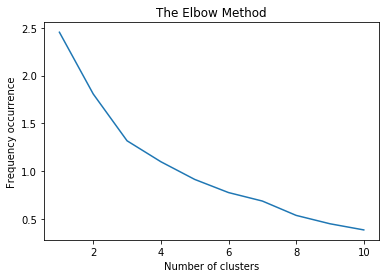

In [33]:
cleveland_grouped_clustering = cleveland_grouped.drop('Neighborhood', 1)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state=0)
    kmeans.fit(cleveland_grouped_clustering)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Frequency occurrence')
plt.show()

### Lets try to clustering Cleveland neighborhoods based on these venues sorted. I selected 5 clusters using k-means clustering  using Elbow method, we can see the rapid change at 5, in this case I chose 5 clusters to see how the data will show. 

In [34]:
# set number of clusters
kclusters = 5

cleveland_grouped_clustering = cleveland_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(cleveland_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 


array([0, 0, 0, 2, 0, 0, 0, 0, 4, 0])

### Create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [35]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

cleveland_merged = neighborhoods_clv

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
cleveland_merged = cleveland_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Name')

cleveland_merged # check the last columns!

,Name,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Buckeye,buck,41.484872,-81.608613,0,Discount Store,Light Rail Station,Chinese Restaurant,Clothing Store,Restaurant,Pizza Place,Sandwich Place,Bank,Steakhouse,Food
1,Shaker Square,ss,41.495017,-81.603253,1,Rock Club,Trail,Zoo Exhibit,Factory,Football Stadium,Food Truck,Food Service,Food & Drink Shop,Food,Flower Shop
2,Central,cen,41.501634,-81.648466,0,Grocery Store,Auto Garage,Bus Stop,History Museum,Music Venue,Café,Food,Food & Drink Shop,Restaurant,Fried Chicken Joint
3,Kinsman,km,41.480901,-81.645777,0,Food,Intersection,Coffee Shop,Fried Chicken Joint,Gas Station,Park,Chinese Restaurant,Light Rail Station,American Restaurant,Wings Joint
4,North Collinwood,ncol,41.555867,-81.591111,2,Food,Grocery Store,Transportation Service,Zoo Exhibit,Factory,Football Stadium,Food Truck,Food Service,Food & Drink Shop,Flower Shop
5,Hough,hough,41.504561,-81.651794,0,Grocery Store,Auto Garage,Food Truck,Storage Facility,Food,Museum,Bus Stop,Discount Store,History Museum,Sandwich Place
6,Asiatown,at,41.510442,-81.670588,0,Chinese Restaurant,Imported Food Shop,Diner,Korean Restaurant,Gym,Pizza Place,Vietnamese Restaurant,Asian Restaurant,Gas Station,Dim Sum Restaurant
7,The Flats,flats,41.494976,-81.710536,0,Harbor / Marina,Brewery,Bar,Gym / Fitness Center,Music Venue,Italian Restaurant,Nightclub,Park,Gastropub,Coffee Shop
8,West Park,wp,41.469688,-81.781418,0,Bar,Thai Restaurant,Coffee Shop,Adult Boutique,Taco Place,Supermarket,Beer Bar,Big Box Store,Light Rail Station,Food Service
9,Cudell,cd,41.462062,-81.768890,0,Middle Eastern Restaurant,Hookah Bar,Liquor Store,Pharmacy,Pizza Place,Bank,Department Store,Discount Store,Gas Station,Diner


In [36]:
neighborhoods_venues_sorted.shape

(24, 12)

In [37]:
cleveland_merged.drop([1], inplace=True)

In [38]:
# Visualize the resulting of the cluster

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# Set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+ x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map

markers_color =[]
for lat, lon, poi, cluster in zip(cleveland_merged['Latitude'], cleveland_merged['Longitude'], cleveland_merged['Name'], cleveland_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
    [lat, lon],
    radius=5,
    popup=label,
    color=rainbow[cluster-1],
    fill=True,
    fill_color=rainbow[cluster-1],
    fill_opacity=0.7).add_to(map_clusters)
    
map_clusters

In [39]:
cleveland_merged.loc[cleveland_merged['Cluster Labels']== 0, cleveland_merged.columns[[0] + list(range(5, cleveland_merged.shape[1]))]]


,Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Buckeye,Discount Store,Light Rail Station,Chinese Restaurant,Clothing Store,Restaurant,Pizza Place,Sandwich Place,Bank,Steakhouse,Food
2,Central,Grocery Store,Auto Garage,Bus Stop,History Museum,Music Venue,Café,Food,Food & Drink Shop,Restaurant,Fried Chicken Joint
3,Kinsman,Food,Intersection,Coffee Shop,Fried Chicken Joint,Gas Station,Park,Chinese Restaurant,Light Rail Station,American Restaurant,Wings Joint
5,Hough,Grocery Store,Auto Garage,Food Truck,Storage Facility,Food,Museum,Bus Stop,Discount Store,History Museum,Sandwich Place
6,Asiatown,Chinese Restaurant,Imported Food Shop,Diner,Korean Restaurant,Gym,Pizza Place,Vietnamese Restaurant,Asian Restaurant,Gas Station,Dim Sum Restaurant
7,The Flats,Harbor / Marina,Brewery,Bar,Gym / Fitness Center,Music Venue,Italian Restaurant,Nightclub,Park,Gastropub,Coffee Shop
8,West Park,Bar,Thai Restaurant,Coffee Shop,Adult Boutique,Taco Place,Supermarket,Beer Bar,Big Box Store,Light Rail Station,Food Service
9,Cudell,Middle Eastern Restaurant,Hookah Bar,Liquor Store,Pharmacy,Pizza Place,Bank,Department Store,Discount Store,Gas Station,Diner
11,Little Italy,Italian Restaurant,Coffee Shop,Sandwich Place,Bakery,Pizza Place,Asian Restaurant,Gym / Fitness Center,Yoga Studio,Concert Hall,Restaurant
12,Warehouse District,Coffee Shop,Hotel,Steakhouse,Park,Burger Joint,American Restaurant,Museum,Music Venue,Seafood Restaurant,Café


In [40]:
cleveland_merged.loc[cleveland_merged['Cluster Labels']== 1, cleveland_merged.columns[[0] + list(range(5, cleveland_merged.shape[1]))]]


,Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue


In [41]:
cleveland_merged.loc[cleveland_merged['Cluster Labels']== 2, cleveland_merged.columns[[0] + list(range(5, cleveland_merged.shape[1]))]]

,Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,North Collinwood,Food,Grocery Store,Transportation Service,Zoo Exhibit,Factory,Football Stadium,Food Truck,Food Service,Food & Drink Shop,Flower Shop
23,Collinwood,Food,Grocery Store,Transportation Service,Zoo Exhibit,Factory,Football Stadium,Food Truck,Food Service,Food & Drink Shop,Flower Shop


In [42]:
cleveland_merged.loc[cleveland_merged['Cluster Labels']== 3, cleveland_merged.columns[[0] + list(range(5, cleveland_merged.shape[1]))]]

,Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,brooklyn Centre,Zoo Exhibit,Deli / Bodega,Convenience Store,Sports Bar,Bakery,Dive Bar,Exhibit,Music Venue,Sandwich Place,Snack Place


In [43]:
cleveland_merged.loc[cleveland_merged['Cluster Labels']== 4, cleveland_merged.columns[[0] + list(range(5, cleveland_merged.shape[1]))]]

,Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
22,Glenville,Intersection,Discount Store,Park,Cafeteria,Financial or Legal Service,Football Stadium,Food Truck,Food Service,Food & Drink Shop,Food


### Since University Circle is a very promising location for this type of business, I would want to explore this neiborhood to see more of what it has.

In [44]:
neighborhoods_clv.loc[21, 'Name']

'University Circle'

In [45]:
# Get the neighborhood's latitude and longitude


In [46]:
uc_latitude = neighborhoods_clv.loc[21, 'Latitude']
uc_longitude = neighborhoods_clv.loc[21, 'Longitude']
radius=500
LIMIT=50

uc_name = neighborhoods_clv.loc[21, 'Name']

print('Latitude and longitude values of {} are {}, {}.'.format(uc_name, 
                                                               uc_latitude, 
                                                               uc_longitude))

Latitude and longitude values of University Circle are 41.50368734752094, -81.61525193164371.


In [47]:
## Lets explore if any Office building, College or School, University, medical center around the neighborhood

In [48]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}&query=medicalcenter'.format(CLIENT_ID,
                                                                                                                           CLIENT_SECRET,
                                                                                                                           uc_latitude,uc_longitude,
                                                                                                                           VERSION,
                                                                                                                           radius,
                                                                                                                           LIMIT)

result = requests.get(url).json()


In [49]:
med_venues = result['response']['venues']

In [60]:
#med_venues

In [51]:
med_venues = json_normalize(med_venues)

In [52]:
med_df = pd.DataFrame(med_venues)

In [53]:
med_df

,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress
0,5d2d040bf5c83300230ed03a,"Keith Cavey, CNP - UH Cleveland Medical Center","[{'id': '52e81612bcbc57f1066b7a39', 'name': 'M...",v-1606934618,False,10524 Euclid Ave,41.502091,-81.613931,"[{'label': 'display', 'lat': 41.502091, 'lng':...",209,44106,US,Cleveland,OH,United States,"[10524 Euclid Ave, Cleveland, OH 44106, United..."
1,5c65f148d48ec10039d9821e,"Megan Testa, MD","[{'id': '52e81612bcbc57f1066b7a39', 'name': 'M...",v-1606934618,False,10524 Euclid Ave,41.502936,-81.614432,"[{'label': 'display', 'lat': 41.50293577294592...",108,44106,US,Cleveland,OH,United States,"[10524 Euclid Ave, Cleveland, OH 44106, United..."
2,5c65ef47418686002c4b8126,"Lois Friedman, PhD","[{'id': '4bf58dd8d48988d177941735', 'name': 'D...",v-1606934618,False,10524 Euclid Ave,41.503110,-81.614297,"[{'label': 'display', 'lat': 41.50310995370685...",102,44106,US,Cleveland,OH,United States,"[10524 Euclid Ave, Cleveland, OH 44106, United..."
3,5c660650b3d8e2002c79e094,"Matig Mavissakalian, MD","[{'id': '52e81612bcbc57f1066b7a39', 'name': 'M...",v-1606934618,False,10524 Euclid Ave,41.502813,-81.614577,"[{'label': 'display', 'lat': 41.50281317714444...",112,44106,US,Cleveland,OH,United States,"[10524 Euclid Ave, Cleveland, OH 44106, United..."
4,5c65e584c62b49002cd4841a,"Kelly Cunningham, LISW","[{'id': '52e81612bcbc57f1066b7a39', 'name': 'M...",v-1606934618,False,10524 Euclid Ave Ste 116,41.503141,-81.614254,"[{'label': 'display', 'lat': 41.50314073620397...",103,44106,US,Cleveland,OH,United States,"[10524 Euclid Ave Ste 116, Cleveland, OH 44106..."
5,5c65eb8218d43b002c05c157,"Martha Sajatovic, MD","[{'id': '52e81612bcbc57f1066b7a39', 'name': 'M...",v-1606934618,False,10524 Euclid Ave,41.502958,-81.614278,"[{'label': 'display', 'lat': 41.50295800772002...",114,44106,US,Cleveland,OH,United States,"[10524 Euclid Ave, Cleveland, OH 44106, United..."
6,5c65ed61178a2a002c313a91,"Luis Amunategui, PhD","[{'id': '4bf58dd8d48988d177941735', 'name': 'D...",v-1606934618,False,10524 Euclid Ave,41.502884,-81.614573,"[{'label': 'display', 'lat': 41.50288352716331...",105,44106,US,Cleveland,OH,United States,"[10524 Euclid Ave, Cleveland, OH 44106, United..."
7,5c65fbc1d1a402002cc388b6,"Kyra Pacer, CNS","[{'id': '52e81612bcbc57f1066b7a39', 'name': 'M...",v-1606934618,False,10524 Euclid Ave,41.503060,-81.614292,"[{'label': 'display', 'lat': 41.50306049326637...",106,44106,US,Cleveland,OH,United States,"[10524 Euclid Ave, Cleveland, OH 44106, United..."
8,5c65f23d2619ee002c27203e,"Cheryl Wills, MD","[{'id': '52e81612bcbc57f1066b7a39', 'name': 'M...",v-1606934618,False,10524 Euclid Ave,41.503011,-81.614378,"[{'label': 'display', 'lat': 41.50301067715858...",104,44106,US,Cleveland,OH,United States,"[10524 Euclid Ave, Cleveland, OH 44106, United..."
9,5c65f7c595a722002cdbe2a6,"Gunnur Karakurt Koyuturk, LMFT, PhD","[{'id': '4bf58dd8d48988d177941735', 'name': 'D...",v-1606934618,False,10524 Euclid Ave,41.502960,-81.614274,"[{'label': 'display', 'lat': 41.50296013116675...",114,44106,US,Cleveland,OH,United States,"[10524 Euclid Ave, Cleveland, OH 44106, United..."


### Lets clean some data and change column's names

In [54]:
med_df.drop(['categories','referralId','hasPerk','location.labeledLatLngs','location.cc','location.state','location.country','location.city','location.formattedAddress'], axis=1, inplace=True)

In [56]:
med_df.drop(['id','location.postalCode'], axis=1, inplace=True)

In [57]:
med_df

,name,location.address,location.lat,location.lng,location.distance
0,"Keith Cavey, CNP - UH Cleveland Medical Center",10524 Euclid Ave,41.502091,-81.613931,209
1,"Megan Testa, MD",10524 Euclid Ave,41.502936,-81.614432,108
2,"Lois Friedman, PhD",10524 Euclid Ave,41.503110,-81.614297,102
3,"Matig Mavissakalian, MD",10524 Euclid Ave,41.502813,-81.614577,112
4,"Kelly Cunningham, LISW",10524 Euclid Ave Ste 116,41.503141,-81.614254,103
5,"Martha Sajatovic, MD",10524 Euclid Ave,41.502958,-81.614278,114
6,"Luis Amunategui, PhD",10524 Euclid Ave,41.502884,-81.614573,105
7,"Kyra Pacer, CNS",10524 Euclid Ave,41.503060,-81.614292,106
8,"Cheryl Wills, MD",10524 Euclid Ave,41.503011,-81.614378,104
9,"Gunnur Karakurt Koyuturk, LMFT, PhD",10524 Euclid Ave,41.502960,-81.614274,114


In [58]:
## change the names of columns

med_df.rename(columns={'name': 'Name MC','location.address':'address', 'location.lat':'Latitude','location.lng':'Longitude', 'location.distance':'Distance'}, inplace=True)

## Lets visualize these location in the map
med_df

,Name MC,address,Latitude,Longitude,Distance
0,"Keith Cavey, CNP - UH Cleveland Medical Center",10524 Euclid Ave,41.502091,-81.613931,209
1,"Megan Testa, MD",10524 Euclid Ave,41.502936,-81.614432,108
2,"Lois Friedman, PhD",10524 Euclid Ave,41.503110,-81.614297,102
3,"Matig Mavissakalian, MD",10524 Euclid Ave,41.502813,-81.614577,112
4,"Kelly Cunningham, LISW",10524 Euclid Ave Ste 116,41.503141,-81.614254,103
5,"Martha Sajatovic, MD",10524 Euclid Ave,41.502958,-81.614278,114
6,"Luis Amunategui, PhD",10524 Euclid Ave,41.502884,-81.614573,105
7,"Kyra Pacer, CNS",10524 Euclid Ave,41.503060,-81.614292,106
8,"Cheryl Wills, MD",10524 Euclid Ave,41.503011,-81.614378,104
9,"Gunnur Karakurt Koyuturk, LMFT, PhD",10524 Euclid Ave,41.502960,-81.614274,114


In [59]:
medical_cleveland = folium.Map(location=[uc_latitude,uc_longitude], zoom_start=10)

# Add markers on the top 
for lat, lon, name, add in zip(med_df['Latitude'], med_df['Longitude'],
                                       med_df['Name MC'], med_df['address']):
    label = '{}, {}'.format(name, add)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(medical_cleveland)
    
medical_cleveland

### As we can see from the map or the dataset, most of the medical office are located in a big hospital, there are some other medical centers around along Euclid Avenue. 